### Importar bibliotecas

In [1]:
# 1. SETUP INICIAL (IMPORTAÇÃO DE BIBLIOTECAS)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Configurações de visualização para os gráficos
sns.set_theme(style="whitegrid", palette="viridis")
plt.rcParams['figure.figsize'] = [12, 7]
plt.rcParams['font.size'] = 12

In [2]:
display_max_columns = None
pd.set_option('display.max_columns', display_max_columns)

### Carregar os dados

In [3]:
caminho_arquivo = "C:\\Users\\laysf\\Documents\\GitHub\\TJGO_CienciaDeDados\\Arquivos\\microdados_censo_escolar_2024\\dados\\microdados_ed_basica_2024.csv"

colunas_escolhidas = ['CO_ENTIDADE', 'NO_ENTIDADE', 'NO_REGIAO', 'CO_REGIAO', 'NO_UF', 'SG_UF', 'CO_UF', 'NO_MUNICIPIO', 'CO_MUNICIPIO', 'TP_DEPENDENCIA', 'TP_CATEGORIA_ESCOLA_PRIVADA', 'TP_LOCALIZACAO', 'TP_LOCALIZACAO_DIFERENCIADA', 'TP_SITUACAO_FUNCIONAMENTO', 'IN_PREDIO_COMPARTILHADO', 'CO_ORGAO_REGIONAL', 'CO_ESCOLA_SEDE_VINCULADA', 'CO_IES_OFERTANTE', 'QT_MAT_BAS', 'QT_MAT_INF', 'QT_MAT_INF_CRE', 'QT_MAT_INF_PRE', 'QT_MAT_FUND', 'QT_MAT_FUND_AI', 'QT_MAT_FUND_AF', 'QT_MAT_MED', 'QT_MAT_BAS_FEM', 'QT_MAT_BAS_MASC', 'QT_MAT_BAS_ND', 'QT_MAT_BAS_BRANCA', 'QT_MAT_BAS_PRETA', 'QT_MAT_BAS_PARDA', 'QT_MAT_BAS_AMARELA', 'QT_MAT_BAS_INDIGENA', 'QT_MAT_INF_INT', 'QT_MAT_INF_CRE_INT', 'QT_MAT_INF_PRE_INT', 'QT_MAT_FUND_INT', 'QT_MAT_FUND_AI_INT', 'QT_MAT_FUND_AF_INT', 'QT_MAT_MED_INT', 'QT_MAT_ZR_URB', 'QT_MAT_ZR_RUR', 'QT_MAT_ZR_NA', 'IN_INTERNET', 'IN_BANDA_LARGA', 'IN_INTERNET_ALUNOS', 'IN_ACESSO_INTERNET_COMPUTADOR', 'IN_ACES_INTERNET_DISP_PESSOAIS', 'TP_REDE_LOCAL', 'IN_LABORATORIO_INFORMATICA', 'QT_DESKTOP_ALUNO', 'QT_COMP_PORTATIL_ALUNO', 'QT_TABLET_ALUNO', 'IN_LOCAL_FUNC_PREDIO_ESCOLAR', 'TP_OCUPACAO_PREDIO_ESCOLAR', 'IN_LOCAL_FUNC_SOCIOEDUCATIVO', 'IN_LOCAL_FUNC_UNID_PRISIONAL', 'IN_LOCAL_FUNC_PRISIONAL_SOCIO', 'IN_LOCAL_FUNC_GALPAO', 'TP_OCUPACAO_GALPAO', 'IN_LOCAL_FUNC_SALAS_OUTRA_ESC', 'IN_LOCAL_FUNC_OUTROS', 'NU_ANO_CENSO', 'DT_ANO_LETIVO_INICIO', 'DT_ANO_LETIVO_TERMINO']

try:
    df_completa = pd.read_csv(caminho_arquivo, sep=';', encoding='latin-1', low_memory=False)
    df = pd.read_csv(caminho_arquivo, sep=';', encoding='latin-1', usecols=colunas_escolhidas, low_memory=False)
    print("Dados carregados com sucesso!")
    print(f"O dataset tem {df.shape[0]} linhas e {df.shape[1]} colunas.")
except FileNotFoundError:
    print(f"Erro: O arquivo não foi encontrado no caminho especificado. Verifique o caminho: {caminho_arquivo}")

Dados carregados com sucesso!
O dataset tem 215545 linhas e 66 colunas.


In [4]:
#display(df_completa)

In [5]:
display(df)

,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,CO_MUNICIPIO,NO_ENTIDADE,CO_ENTIDADE,TP_DEPENDENCIA,TP_CATEGORIA_ESCOLA_PRIVADA,TP_LOCALIZACAO,TP_LOCALIZACAO_DIFERENCIADA,TP_SITUACAO_FUNCIONAMENTO,CO_ORGAO_REGIONAL,DT_ANO_LETIVO_INICIO,DT_ANO_LETIVO_TERMINO,CO_ESCOLA_SEDE_VINCULADA,CO_IES_OFERTANTE,IN_LOCAL_FUNC_PREDIO_ESCOLAR,TP_OCUPACAO_PREDIO_ESCOLAR,IN_LOCAL_FUNC_SOCIOEDUCATIVO,IN_LOCAL_FUNC_UNID_PRISIONAL,IN_LOCAL_FUNC_PRISIONAL_SOCIO,IN_LOCAL_FUNC_GALPAO,TP_OCUPACAO_GALPAO,IN_LOCAL_FUNC_SALAS_OUTRA_ESC,IN_LOCAL_FUNC_OUTROS,IN_PREDIO_COMPARTILHADO,IN_LABORATORIO_INFORMATICA,QT_DESKTOP_ALUNO,QT_COMP_PORTATIL_ALUNO,QT_TABLET_ALUNO,IN_INTERNET,IN_INTERNET_ALUNOS,IN_ACESSO_INTERNET_COMPUTADOR,IN_ACES_INTERNET_DISP_PESSOAIS,TP_REDE_LOCAL,IN_BANDA_LARGA,QT_MAT_BAS,QT_MAT_INF,QT_MAT_INF_CRE,QT_MAT_INF_PRE,QT_MAT_FUND,QT_MAT_FUND_AI,QT_MAT_FUND_AF,QT_MAT_MED,QT_MAT_BAS_FEM,QT_MAT_BAS_MASC,QT_MAT_BAS_ND,QT_MAT_BAS_BRANCA,QT_MAT_BAS_PRETA,QT_MAT_BAS_PARDA,QT_MAT_BAS_AMARELA,QT_MAT_BAS_INDIGENA,QT_MAT_INF_INT,QT_MAT_INF_CRE_INT,QT_MAT_INF_PRE_INT,QT_MAT_FUND_INT,QT_MAT_FUND_AI_INT,QT_MAT_FUND_AF_INT,QT_MAT_MED_INT,QT_MAT_ZR_URB,QT_MAT_ZR_RUR,QT_MAT_ZR_NA
0,2024,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,EIEEF HAP BITT TUPARI,11022558,2,NaN,2,2.0,1,00015,12FEB2024:00:00:00,13DEC2024:00:00:00,NaN,NaN,1.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,9.0,0.0,4.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
1,2024,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,CEEJA LUIZ VAZ DE CAMOES,11024275,2,NaN,1,0.0,1,00015,09FEB2024:00:00:00,19DEC2024:00:00:00,NaN,NaN,1.0,1.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,1.0,1.0,19.0,4.0,0.0,1.0,1.0,1.0,1.0,3.0,1.0,131.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84.0,47.0,0.0,33.0,6.0,88.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0,51.0,0.0
2,2024,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,EMMEF 7 DE SETEMBRO,11024291,3,NaN,2,NaN,2,00015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,EMEIEF BOA ESPERANCA,11024666,3,NaN,2,0.0,1,00015,08FEB2024:00:00:00,14DEC2024:00:00:00,NaN,NaN,1.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,169.0,32.0,0.0,32.0,137.0,66.0,71.0,0.0,76.0,93.0,0.0,73.0,3.0,89.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,169.0,0.0
4,2024,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,EEEFM EURIDICE LOPES PEDROSO,11024682,2,NaN,1,0.0,1,00015,09FEB2024:00:00:00,14DEC2024:00:00:00,NaN,NaN,1.0,1.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,0.0,1.0,19.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,1.0,598.0,0.0,0.0,0.0,237.0,0.0,237.0,361.0,281.0,317.0,4.0,191.0,21.0,371.0,1.0,10.0,0.0,0.0,0.0,13.0,0.0,13.0,0.0,302.0,296.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215540,2024,Centro-Oeste,5,Distrito Federal,DF,53,Brasília,5300108,ESC PEQUENO ENCANTO,53084020,4,1.0,1,0.0,1,00099,24JAN2024:00:00:00,06DEC2024:00:00:00,NaN,NaN,1.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,1.0,20.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,1.0,123.0,66.0,28.0,38.0,57.0,57.0,0.0,0.0,69.0,54.0,12.0,44.0,1.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123.0,0.0,0.0
215541,2024,Centro-Oeste,5,Distrito Federal,DF,53,Brasília,5300108,SOCIEDADE ANCHIETA DE EDUCACAO INTEGRAL LTDA,53084039,4,1.0,1,0.0,1,00099,01JAN2024:00:00:00,31DEC2024:00:00:00,NaN,NaN,1.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,1.0,20.0,10.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,382.0,162.0,109.0,53.0,220.0,137.0,83.0,0.0,197.0,185.0,274.0,21.0,1.0,86.0,0.0,0.0,66.0,66.0,0.0,0.0,0.0,0.0,0.0,382.0,0.0,0.0
215542,2024,Centro-Oeste,5,Distrito Federal,DF,53,Brasília,5

### Limpar os dados

In [6]:
colunas_qt = [col for col in df.columns if col.startswith('QT_')]
df[colunas_qt] = df[colunas_qt].fillna(0)

# Filtro original para escolas ativas
df_tratado = df[df['TP_SITUACAO_FUNCIONAMENTO'] == 1].copy()

# NOVO FILTRO: Manter apenas escolas que oferecem Ensino Médio (têm matrículas > 0)
df_ensino_medio = df_tratado[df_tratado['QT_MAT_MED'] > 0].copy()

print(f"Dataset filtrado para {len(df_ensino_medio)} escolas que oferecem Ensino Médio.")

Dataset filtrado para 29993 escolas que oferecem Ensino Médio.


In [7]:
# Substituir '88888.0' por np.nan
df_tratado['QT_DESKTOP_ALUNO'] = df_tratado['QT_DESKTOP_ALUNO'].replace(88888.0, np.nan)
df_tratado['QT_COMP_PORTATIL_ALUNO'] = df_tratado['QT_COMP_PORTATIL_ALUNO'].replace(88888.0, np.nan)
df_tratado['QT_TABLET_ALUNO'] = df_tratado['QT_TABLET_ALUNO'].replace(88888.0, np.nan)

### Tratamento dos dados

In [8]:
df_ensino_medio['QT_TOTAL_DISPOSITIVOS'] = df_ensino_medio['QT_DESKTOP_ALUNO'] + df_ensino_medio['QT_COMP_PORTATIL_ALUNO'] + df_ensino_medio['QT_TABLET_ALUNO']

# MÉTRICA AJUSTADA: Alunos do ENSINO MÉDIO por dispositivo
def calcular_proporcao_ensino_medio(row):
    qt_dispositivos = row['QT_TOTAL_DISPOSITIVOS']
    qt_mat_medio = row['QT_MAT_MED'] # <-- MUDANÇA AQUI
    
    # Ignorar escolas sem alunos no ensino médio (já filtrado, mas é uma segurança)
    if qt_mat_medio == 0:
        return np.nan

    if qt_dispositivos > 0:
        return qt_mat_medio / qt_dispositivos
    
    return np.inf

df_ensino_medio['ALUNOS_MEDIO_POR_DISPOSITIVO'] = df_ensino_medio.apply(calcular_proporcao_ensino_medio, axis=1)

# Criando o índice categórico com base na nova métrica
def classificar_acesso(ratio):
    if ratio == np.inf: return 'Nenhum'
    if ratio > 50: return 'Crítico'
    if ratio > 25: return 'Baixo'
    if ratio > 10: return 'Adequado'
    return 'Ideal'

df_ensino_medio['INDICE_ACESSO_EM'] = df_ensino_medio['ALUNOS_MEDIO_POR_DISPOSITIVO'].apply(classificar_acesso)

# Mapeando códigos para nomes legíveis
df_ensino_medio['TP_DEPENDENCIA_NOME'] = df_ensino_medio['TP_DEPENDENCIA'].map({1: 'Federal', 2: 'Estadual', 3: 'Municipal', 4: 'Privada'})
df_ensino_medio['TP_LOCALIZACAO_NOME'] = df_ensino_medio['TP_LOCALIZACAO'].map({1: 'Urbana', 2: 'Rural'})

# Exibindo as primeiras linhas com as novas colunas
df_ensino_medio[['NO_ENTIDADE', 'QT_MAT_MED', 'QT_TOTAL_DISPOSITIVOS', 'ALUNOS_MEDIO_POR_DISPOSITIVO', 'INDICE_ACESSO_EM']].head()

,NO_ENTIDADE,QT_MAT_MED,QT_TOTAL_DISPOSITIVOS,ALUNOS_MEDIO_POR_DISPOSITIVO,INDICE_ACESSO_EM
4,EEEFM EURIDICE LOPES PEDROSO,361.0,19.0,19.0,Adequado
6,EEEMTI JUSCELINO KUBITSCHEK DE OLIVEIRA,250.0,25.0,10.0,Ideal
13,COLEGIO TIRADENTES DA POLICIA MILITAR - CTPM XI,322.0,28.0,11.5,Adequado
15,EIEEFM KON KOATT TUPARI,24.0,0.0,inf,Nenhum
17,EIEEFM BOATT GERAINNY,18.0,0.0,inf,Nenhum


### Análise Exploratória (EDA)

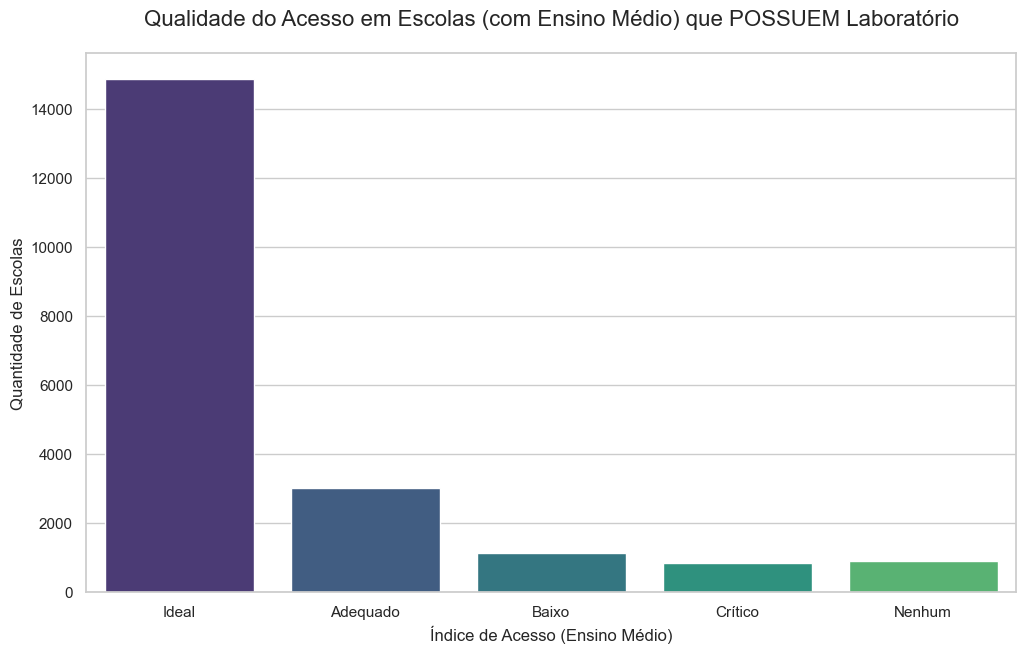

In [13]:
df_com_lab = df_ensino_medio[df_ensino_medio['IN_LABORATORIO_INFORMATICA'] == 1]

plt.figure()

sns.countplot(
    data=df_com_lab,
    x='INDICE_ACESSO_EM',
    order=['Ideal', 'Adequado', 'Baixo', 'Crítico', 'Nenhum']
)

plt.title('Qualidade do Acesso em Escolas (com Ensino Médio) que POSSUEM Laboratório', fontsize=16, pad=20)
plt.xlabel('Índice de Acesso (Ensino Médio)')
plt.ylabel('Quantidade de Escolas')
plt.show()

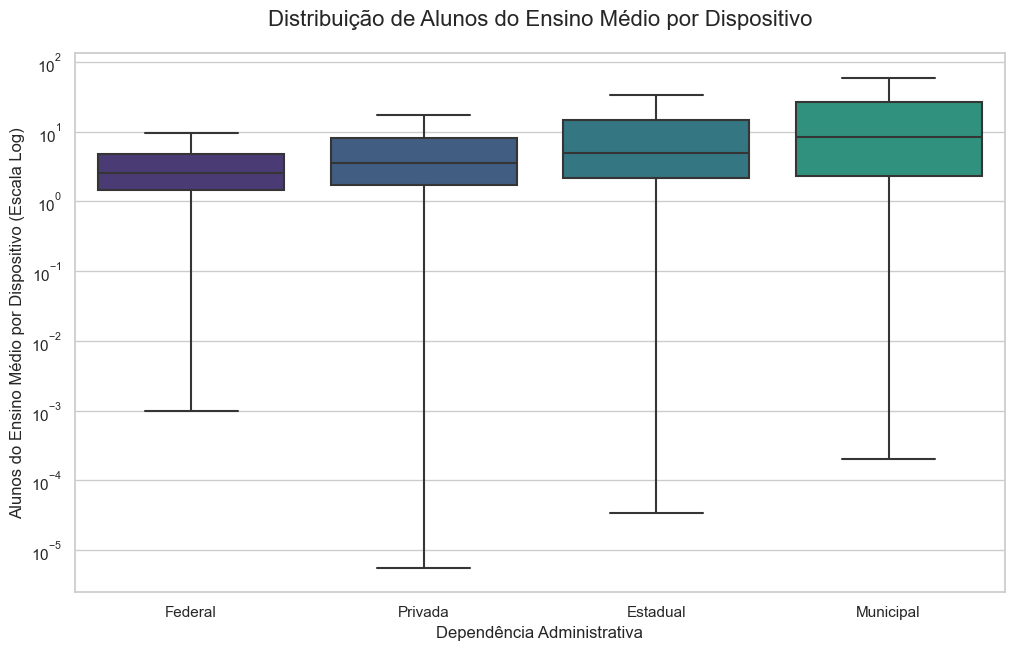

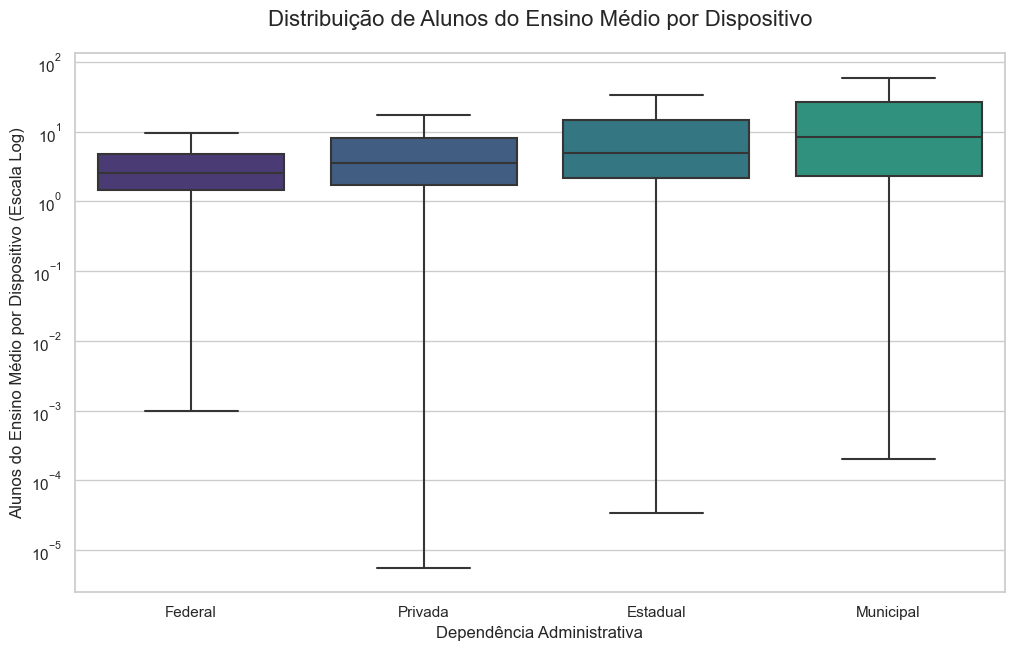

In [14]:
df_plot_dep_em = df_ensino_medio[df_ensino_medio['ALUNOS_MEDIO_POR_DISPOSITIVO'] != np.inf].copy()

plt.figure()

sns.boxplot(
    data=df_plot_dep_em, 
    x='TP_DEPENDENCIA_NOME', 
    y='ALUNOS_MEDIO_POR_DISPOSITIVO', # <-- CORREÇÃO AQUI
    showfliers=False, 
    order=['Federal', 'Privada', 'Estadual', 'Municipal']
)

plt.title('Distribuição de Alunos do Ensino Médio por Dispositivo', fontsize=16, pad=20)
plt.xlabel('Dependência Administrativa')
plt.ylabel('Alunos do Ensino Médio por Dispositivo (Escala Log)')
plt.yscale('log')
plt.show()

df_plot_dep_em = df_ensino_medio[df_ensino_medio['ALUNOS_MEDIO_POR_DISPOSITIVO'] != np.inf].copy()

plt.figure()

sns.boxplot(
    data=df_plot_dep_em, 
    x='TP_DEPENDENCIA_NOME', 
    y='ALUNOS_MEDIO_POR_DISPOSITIVO',
    showfliers=False, 
    order=['Federal', 'Privada', 'Estadual', 'Municipal']
)

plt.title('Distribuição de Alunos do Ensino Médio por Dispositivo', fontsize=16, pad=20)
plt.xlabel('Dependência Administrativa')
plt.ylabel('Alunos do Ensino Médio por Dispositivo (Escala Log)')
plt.yscale('log')
plt.show()

In [15]:
# Gráfico 3: Desigualdade por Localização Diferenciada (Equidade)
print("Gerando Gráfico 3: Desigualdade em áreas de vulnerabilidade...")
df_loc_dif = df_tratado[df_tratado['TP_LOCALIZACAO_DIFERENCIADA'] > 0].copy()
df_loc_dif['TP_LOC_DIF_NOME'] = df_loc_dif['TP_LOCALIZACAO_DIFERENCIADA'].map({1: 'Assentamento', 2: 'Terra Indígena', 3: 'Quilombo'})

# Tratando valores infinitos para o cálculo da média
df_loc_dif_plot = df_loc_dif[df_loc_dif['ALUNOS_POR_DISPOSITIVO'] != np.inf]

plt.figure()
sns.barplot(data=df_loc_dif_plot, x='TP_LOC_DIF_NOME', y='ALUNOS_POR_DISPOSITIVO', estimator=np.mean)
plt.title('Média de Alunos por Dispositivo em Áreas de Vulnerabilidade', fontsize=16, pad=20)
plt.xlabel('Tipo de Localização Diferenciada')
plt.ylabel('Média de Alunos por Dispositivo')
plt.show()

Gerando Gráfico 3: Desigualdade em áreas de vulnerabilidade...


KeyError: 'ALUNOS_POR_DISPOSITIVO'

Gerando Gráfico 4: Ranking de Desigualdade por UF...


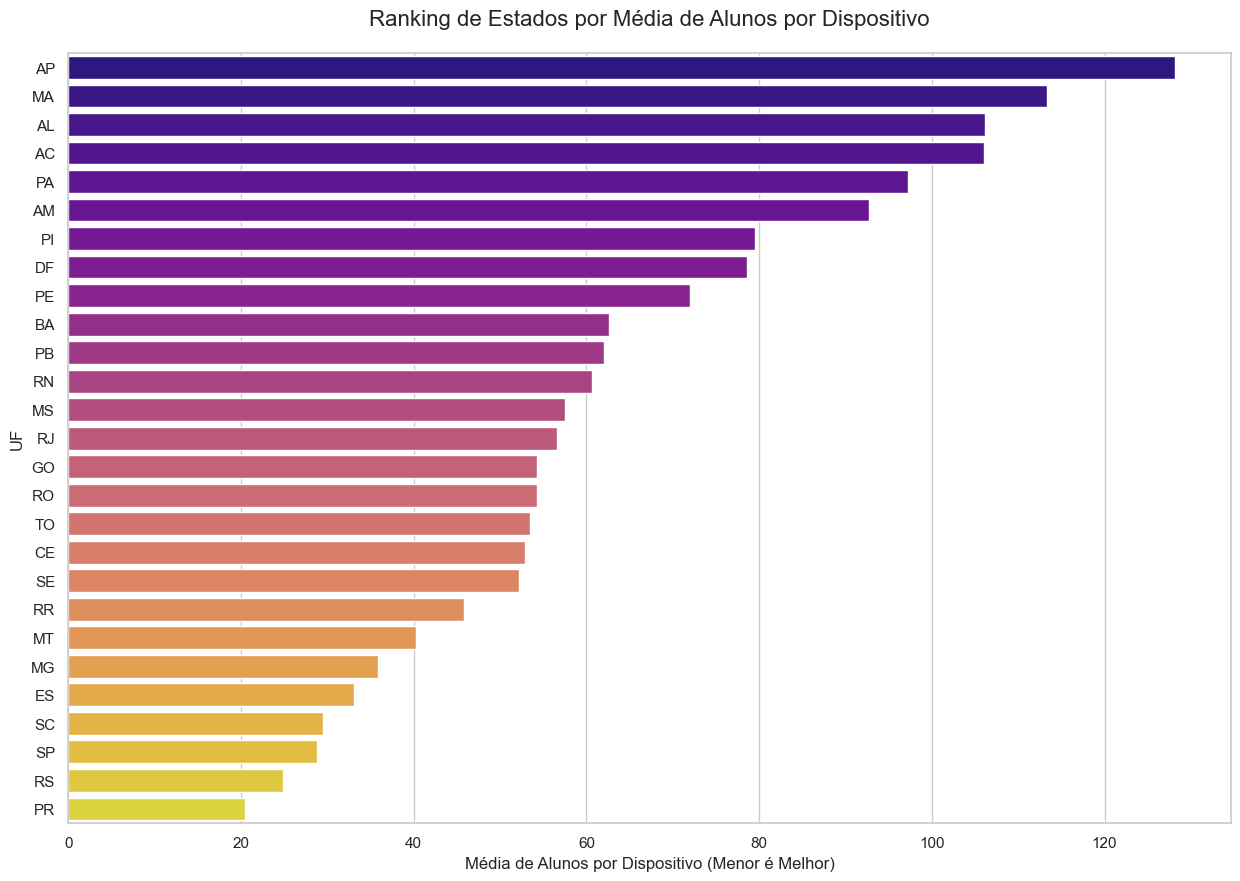

In [ ]:
# --- Análise por Unidade Federativa (UF) ---

print("Gerando Gráfico 4: Ranking de Desigualdade por UF...")

# Calcular a média de alunos por dispositivo para cada estado
# Usamos o dataframe que não tem valores infinitos para o cálculo da média
df_uf = df_tratado[df_tratado['ALUNOS_POR_DISPOSITIVO'] != np.inf].copy()
media_por_uf = df_uf.groupby('SG_UF')['ALUNOS_POR_DISPOSITIVO'].mean().sort_values(ascending=False)

# Criar o gráfico de barras
plt.figure(figsize=(15, 10))
sns.barplot(x=media_por_uf.values, y=media_por_uf.index, palette="plasma", orient='h')

plt.title('Ranking de Estados por Média de Alunos por Dispositivo', fontsize=16, pad=20)
plt.xlabel('Média de Alunos por Dispositivo (Menor é Melhor)')
plt.ylabel('UF')
plt.show()

Gerando Gráfico 5: Análise cruzada por UF e Dependência...


c:\Users\laysf\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


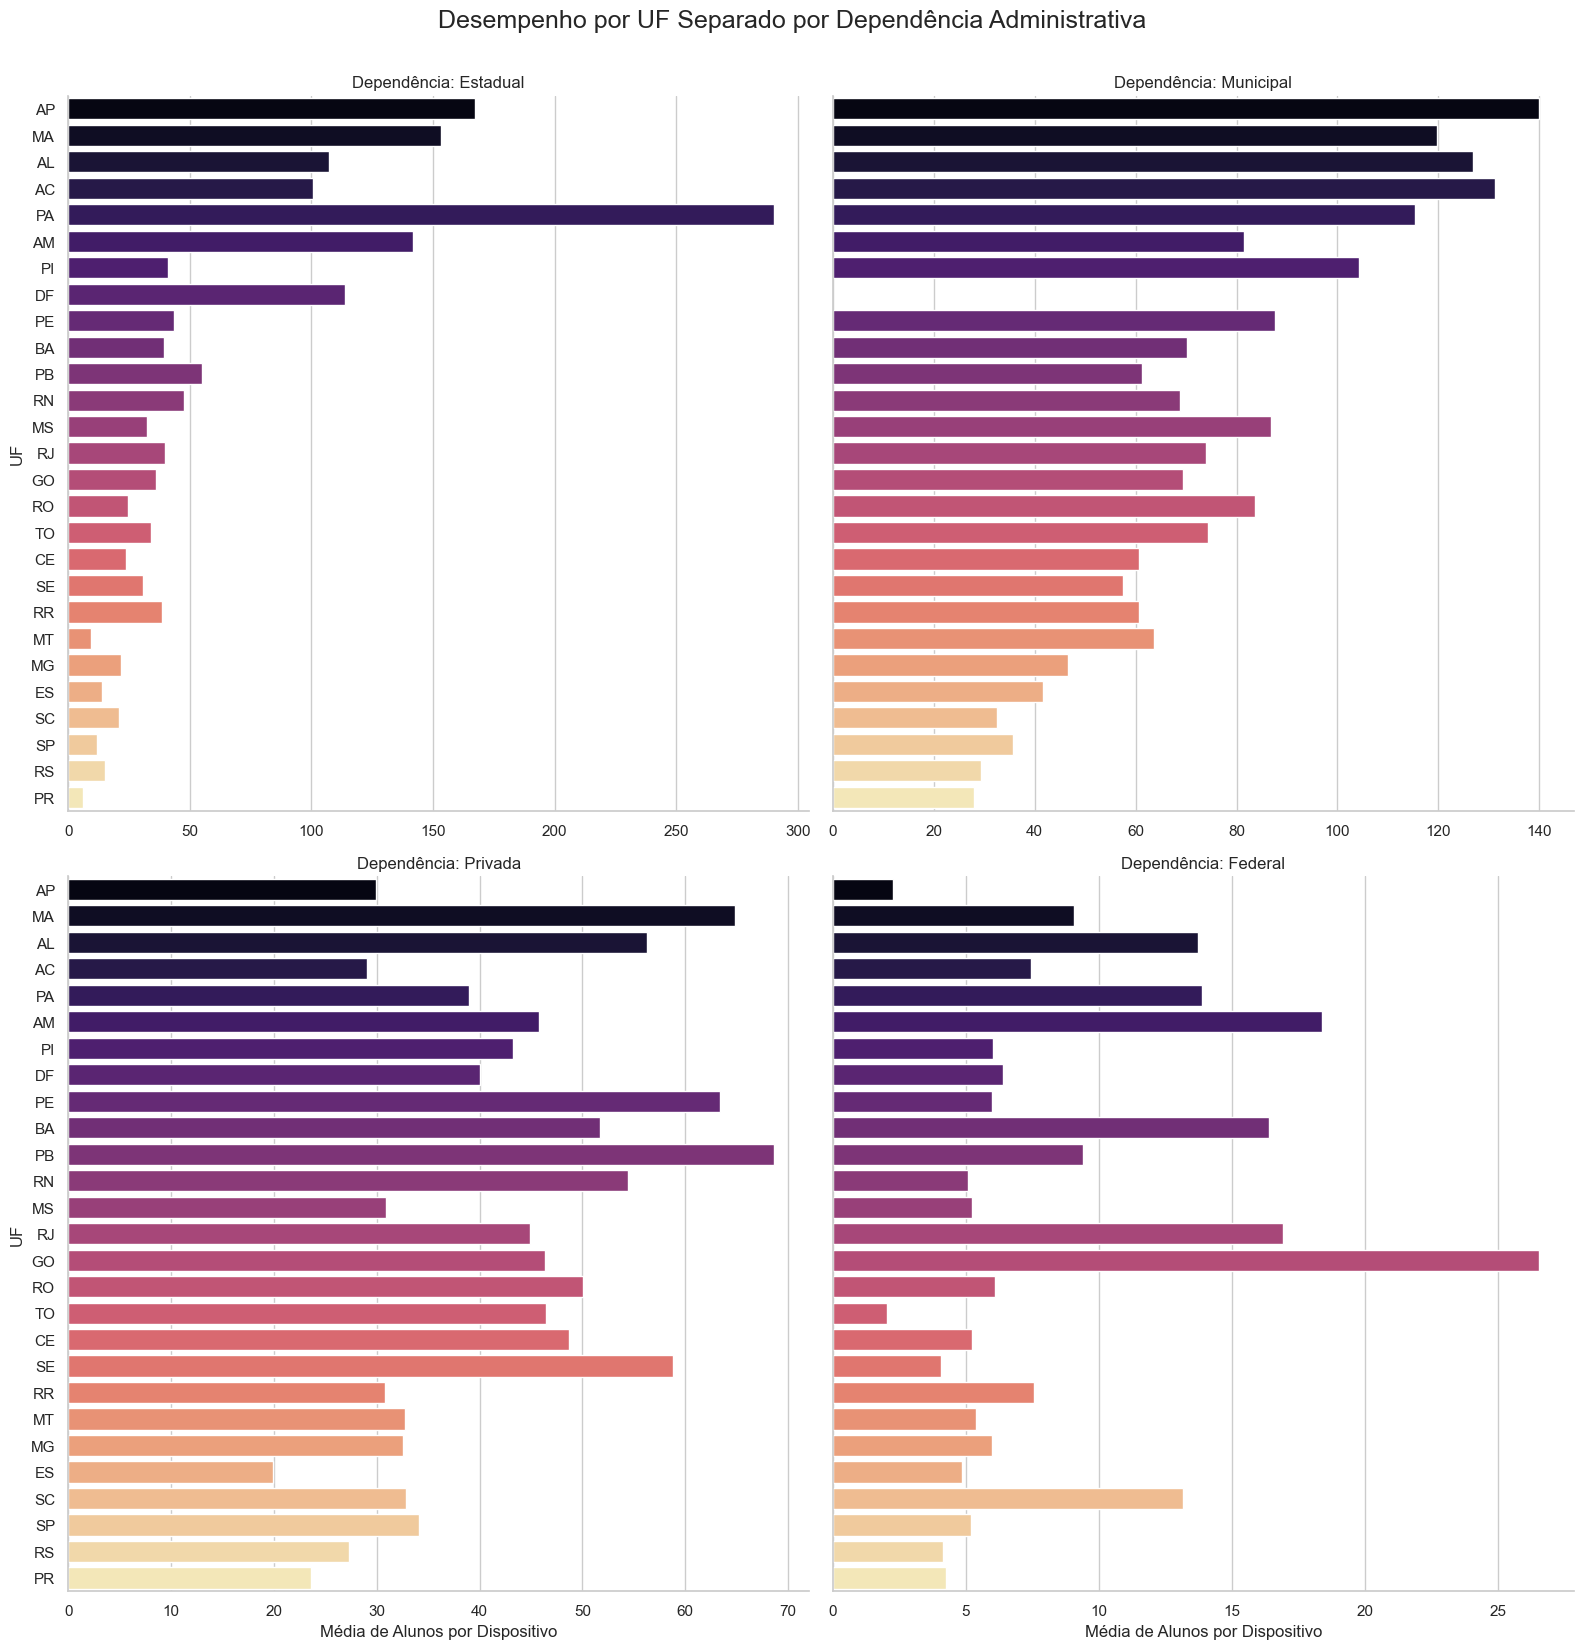

In [ ]:
# --- Análise Cruzada: UF vs. Dependência Administrativa ---
print("Gerando Gráfico 5: Análise cruzada por UF e Dependência...")

# Usamos o catplot para criar uma grade de gráficos (um para cada dependência)
g = sns.catplot(
    data=df_uf,
    x='ALUNOS_POR_DISPOSITIVO',
    y='SG_UF',
    col='TP_DEPENDENCIA_NOME',
    kind='bar',
    col_wrap=2, # Duas colunas de gráficos
    height=8,
    aspect=1,
    sharex=False, # Eixo X independente para cada gráfico
    order=media_por_uf.index, # Ordenar os estados pelo ranking geral
    estimator=np.mean,
    errorbar=None,
    palette='magma'
)

g.fig.suptitle('Desempenho por UF Separado por Dependência Administrativa', y=1.03, fontsize=18)
g.set_axis_labels('Média de Alunos por Dispositivo', 'UF')
g.set_titles("Dependência: {col_name}")
plt.show()

### Clusterização

In [ ]:
# Seleção de features para o modelo
features_cluster = [
    'QT_MAT_BAS',
    'ALUNOS_POR_DISPOSITIVO',
    'TP_DEPENDENCIA',
    'IN_BANDA_LARGA',
    'IN_LABORATORIO_INFORMATICA',
    'SG_UF'
]

# Preparação do dataframe para o modelo
df_cluster = df_tratado[features_cluster].copy()
df_cluster['ALUNOS_POR_DISPOSITIVO'].replace([np.inf], 999, inplace=True)
df_cluster.dropna(inplace=True)

df_cluster_encoded = pd.get_dummies(
    df_cluster,
    columns=['TP_DEPENDENCIA', 'SG_UF'], # Lista de colunas a serem transformadas
    drop_first=True # Boa prática para evitar redundância de colunas
)

In [ ]:
pipeline = make_pipeline(
    StandardScaler(),
    KMeans(n_clusters=4, random_state=42, n_init='auto')
)

df_cluster_encoded['cluster'] = pipeline.fit_predict(df_cluster_encoded)

In [ ]:
df_analise_final = df_tratado.loc[df_cluster.index].copy()
df_analise_final['cluster'] = df_cluster_encoded['cluster']

# Calcular a média das features numéricas por cluster
resumo_numerico = df_analise_final.groupby('cluster')[['QT_MAT_BAS', 'ALUNOS_POR_DISPOSITIVO']].mean().round(2)

# Calcular a moda das features categóricas por cluster
resumo_categorico = df_analise_final.groupby('cluster')[['TP_DEPENDENCIA_NOME', 'TP_LOCALIZACAO_NOME']].agg(lambda x: x.mode()[0])

# Juntar os resumos para criar a tabela de perfis
resumo_final_clusters = pd.concat([resumo_numerico, resumo_categorico], axis=1)

print(resumo_final_clusters)


print("\n--- Análise de UF por Cluster (Exemplo com Cluster 0) ---")
cluster_exemplo = 0
uf_distribution = df_analise_final[df_analise_final['cluster'] == cluster_exemplo]['SG_UF'].value_counts().nlargest(5)
print(f"Top 5 UFs mais comuns no Cluster {cluster_exemplo}:\n{uf_distribution}")

         QT_MAT_BAS  ALUNOS_POR_DISPOSITIVO TP_DEPENDENCIA_NOME  \
cluster                                                           
0            236.56                     NaN           Municipal   
1            513.73                     NaN            Estadual   
2            317.24                     NaN           Municipal   
3            216.84                     NaN             Privada   

        TP_LOCALIZACAO_NOME  
cluster                      
0                    Urbana  
1                    Urbana  
2                    Urbana  
3                    Urbana  

--- Análise de UF por Cluster (Exemplo com Cluster 0) ---
Top 5 UFs mais comuns no Cluster 0:
SG_UF
SP    12991
BA    10734
MG     7859
MA     7106
PA     5562
Name: count, dtype: int64


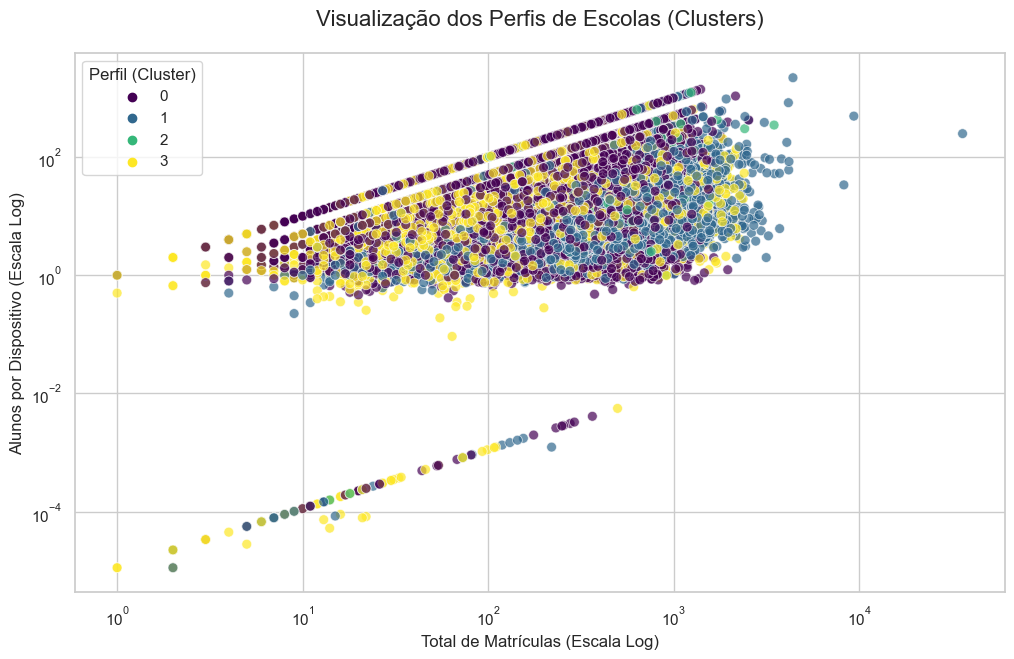

In [ ]:
plt.figure()

sample_df = df_analise_final.sample(n=min(50000, len(df_analise_final)), random_state=42)

sns.scatterplot(data=sample_df, x='QT_MAT_BAS', y='ALUNOS_POR_DISPOSITIVO', hue='cluster', palette='viridis', alpha=0.7, s=50)
plt.title('Visualização dos Perfis de Escolas (Clusters)', fontsize=16, pad=20)
plt.xlabel('Total de Matrículas (Escala Log)')
plt.ylabel('Alunos por Dispositivo (Escala Log)')
plt.yscale('log')
plt.xscale('log')
plt.legend(title='Perfil (Cluster)')
plt.show()

c:\Users\laysf\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


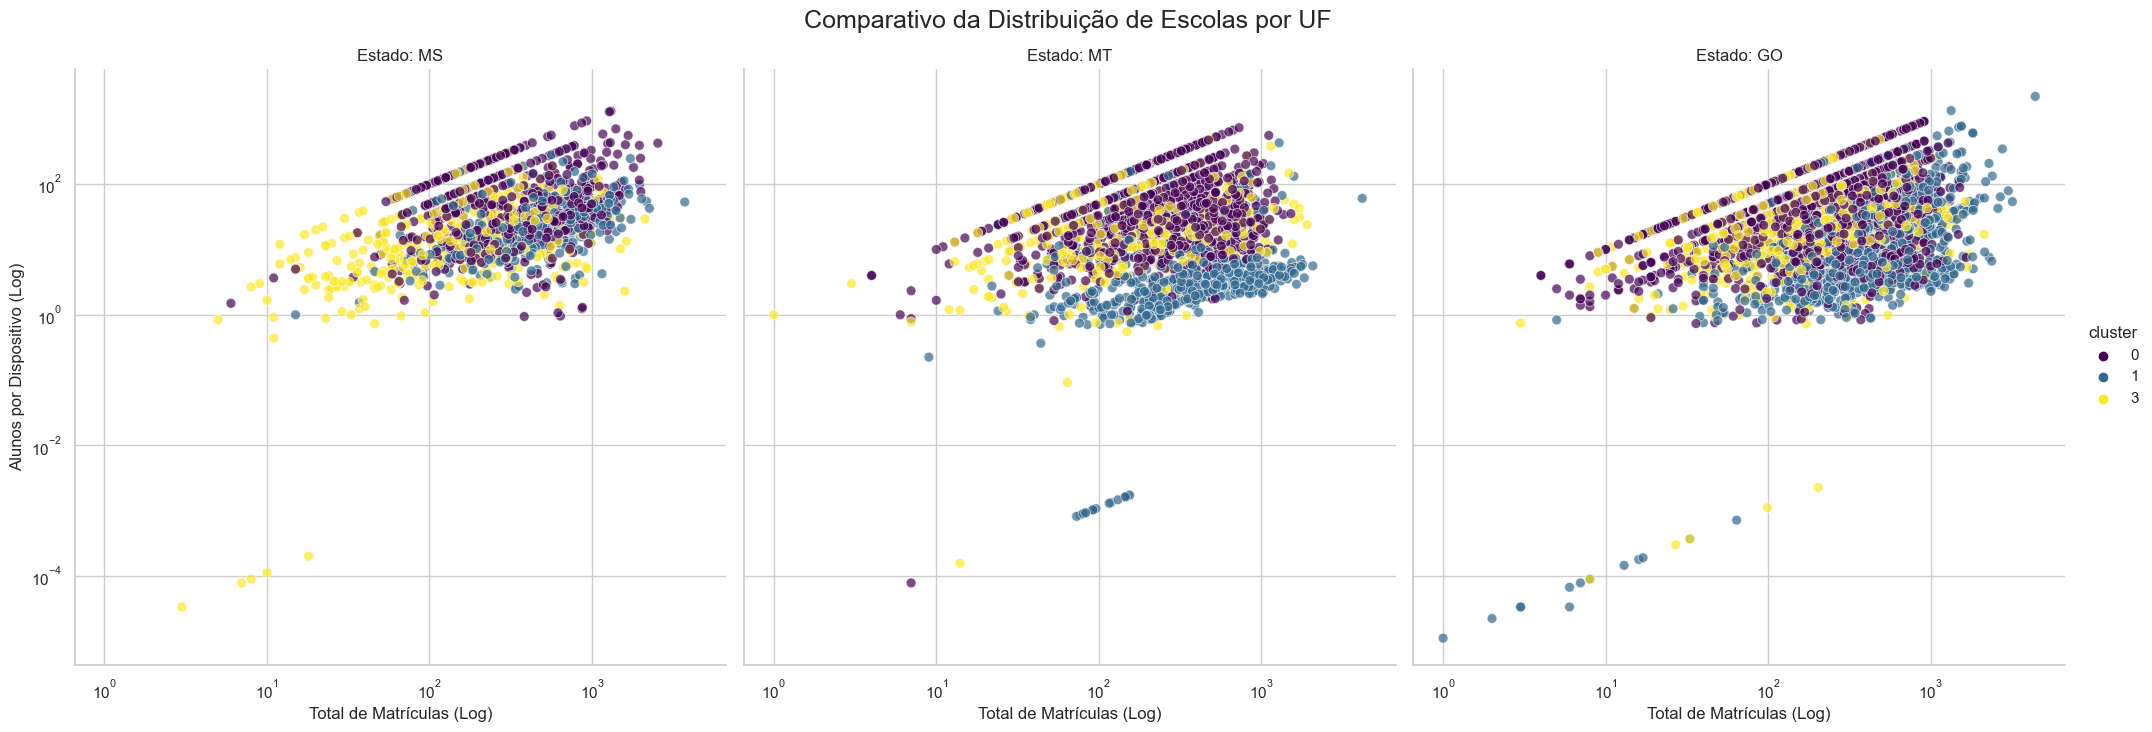

In [ ]:
# --- Visualização Comparativa entre Estados ---

ufs_comparar = ['MT', 'MS', 'GO']

df_comparativo = df_analise_final[df_analise_final['SG_UF'].isin(ufs_comparar)]

g = sns.relplot(
    data=df_comparativo,
    x='QT_MAT_BAS',
    y='ALUNOS_POR_DISPOSITIVO',
    hue='cluster',
    col='SG_UF',
    palette='viridis',
    height=7,
    aspect=1,
    s=50,
    alpha=0.7
)

g.fig.suptitle('Comparativo da Distribuição de Escolas por UF', y=1.03, fontsize=18)
g.set_axis_labels('Total de Matrículas (Log)', 'Alunos por Dispositivo (Log)')
g.set_titles("Estado: {col_name}")
g.set(xscale="log", yscale="log")
plt.show()

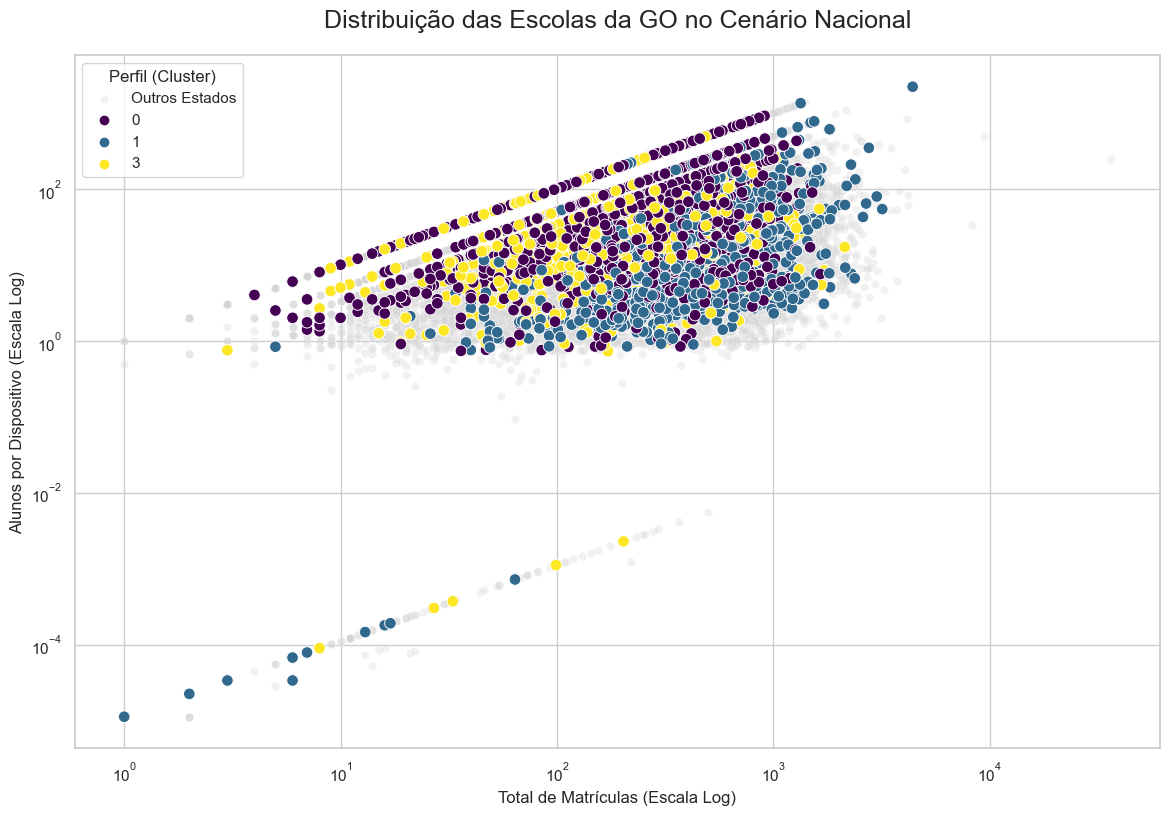

In [ ]:
# --- Visualização com Foco em um Estado Específico ---

uf_foco = 'GO' 

plt.figure(figsize=(14, 9))

sns.scatterplot(
    data=sample_df, 
    x='QT_MAT_BAS', 
    y='ALUNOS_POR_DISPOSITIVO', 
    color='lightgray',
    alpha=0.3,
    label='Outros Estados'
)

df_foco = df_analise_final[df_analise_final['SG_UF'] == uf_foco]
sns.scatterplot(
    data=df_foco, 
    x='QT_MAT_BAS', 
    y='ALUNOS_POR_DISPOSITIVO', 
    hue='cluster', 
    palette='viridis',
    s=70, # Aumenta o tamanho dos pontos para destaque
    legend='full'
)

plt.title(f'Distribuição das Escolas da {uf_foco} no Cenário Nacional', fontsize=18, pad=20)
plt.xlabel('Total de Matrículas (Escala Log)')
plt.ylabel('Alunos por Dispositivo (Escala Log)')
plt.yscale('log')
plt.xscale('log')
plt.legend(title='Perfil (Cluster)')
plt.savefig("cluster_GO.png")
plt.show()